In [2]:
!pip install InstagramAPI

     |████████████████████████████████| 522kB 2.9MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 133kB 17.9MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 3.3MB 25.6MB/s 
  Created wheel for InstagramAPI: filename=InstagramAPI-1.0.2-cp37-none-any.whl size=14021 sha256=f2d9b6a9ac2f6e4473c190737463e7099fdff8964400d2c85814008e111cd251
  Stored in directory: /root/.cache/pip/wheels/6c/00/8f/ff713f248704d409ad2c2fc1352ce62b2b4d7d12a75267a911
  Created wheel for imageio: filename=imageio-2.1.2-cp37-none-any.whl size=3248817 sha256=df989c61c77ed99abe2880b93ab3bfc28c5b1cfad41f59c501585c52f707e53a
  Stored in directory: /root/.cache/pip/wheels/46/d7/61/fe435bf3dc20403ff38ffed213528ae710b4301ac6b403c582
Successfully built InstagramAPI imageio
ERROR: tensorflow-datasets 4.0.1 has requirement requests>=2.19.0, but you'll have requests 2.11.1 which is incompatible.
ERROR: tensorboard 2.5.0 has re

In [3]:
from InstagramAPI import InstagramAPI
import pandas as pd
from pandas.io.json import json_normalize



def login_to_instagram(username, password):
    api = InstagramAPI('angel0tech', 'password')
    api.login()
    
    return api


api = login_to_instagram('instagram_username','instagram_password')

Request return 405 error!
{'message': '', 'status': 'fail'}
Request return 404 error!
Login success!



In [4]:
def get_my_posts(api):
    
    my_posts = []
    has_more_posts = True
    max_id= ''

    while has_more_posts:
        api.getSelfUserFeed(maxid=max_id)
        if api.LastJson['more_available'] is not True:
            has_more_posts = False 

        max_id = api.LastJson.get('next_max_id','')
        my_posts.extend(api.LastJson['items']) 
        

        if has_more_posts:
            print(str(len(my_posts)) + ' posts retrieved so far...')

    print('Total posts retrieved: ' + str(len(my_posts)))
    
    return my_posts

my_posts = get_my_posts(api)

Total posts retrieved: 2


In [35]:
def get_posts_likers(api, my_posts):
 
    likers = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getMediaLikers(m_id)
        
        likers += [api.LastJson]
       
        likers[i]['post_id'] = m_id
        
      
    print('done')
    return likers


likers = get_posts_likers(api, my_posts)


wait 0.1 minutes
done


In [37]:
def posts_likers_to_df(likers):
    
    
    df_likers = json_normalize(likers, 'users', ['post_id'])
   
    df_likers['content_type'] = 'like'
    
    return df_likers
    df_likers = posts_likers_to_df(likers)

print('Total posts: ' + str(len(my_posts)))
print('---------')
print('Total likes on profile: ' + str(df_likers.shape[0])) 
print('Distinct users that liked your posts: ' +str(df_likers.username.nunique()))

Total posts: 2
---------
Total likes on profile: 9
Distinct users that liked your posts: 6


In [38]:
df_likers.username.value_counts()

andjela_98k               2
clockwork_angelsxbooks    2
madalina_andreeab         2
masa_lavica               1
monica_d_j                1
fbimostunwanted           1
Name: username, dtype: int64

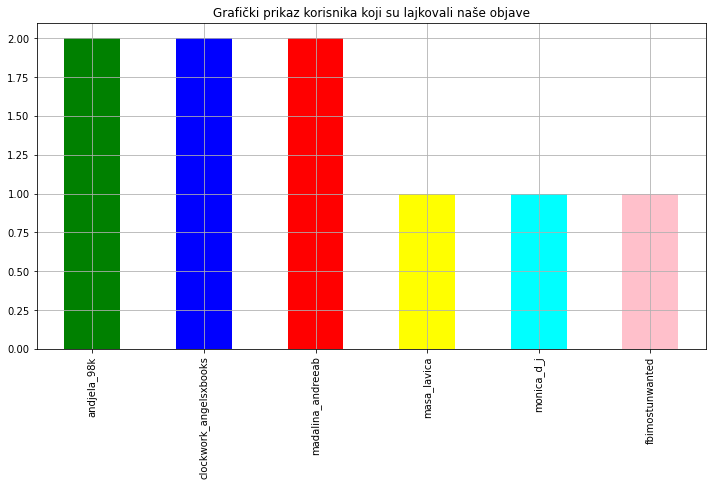

In [40]:
df_likers.username.value_counts().plot(kind='bar', title='Grafički prikaz korisnika koji su lajkovali naše objave', grid=True, figsize=(12,6), color=['green','blue', 'red', 'yellow','cyan','pink'])